In [1]:
from imports import *
import wrangle as wr
df = wr.wrangle_hotel()
#df = wr.fill_coord_nulls(df)
#df.nights_stayed = df.nights_stayed.fillna(1)


df.info()
df.head()


Using cached file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 515738 non-null  object 
 1   month_name                                  515738 non-null  object 
 2   month                                       515738 non-null  int64  
 3   year                                        515738 non-null  int64  
 4   day_name                                    515738 non-null  object 
 5   day                                         515738 non-null  int64  
 6   quarter                                     515738 non-null  int64  
 7   hotel_name                                  515738 non-null  object 
 8   street                                      515738 non-null  object 
 9   city                                        51573

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,negative_topic,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,positive_topic,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,facilities,0.4019,8,6,0.4019,location,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2.0,group,10,8.3,passive,730,0.0000,0.0000,0,2,blank,0.7906,7,6,0.7906,location,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3.0,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,blank,0.7579,7,6,0.7579,hotel,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2.0,group,34,9.6,promoter,730,0.0000,0.0000,0,2,blank,0.9414,27,23,0.9414,location,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1.0,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,blank,0.7964,6,5,0.7964,location,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [2]:
df = wr.fill_coord_nulls(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 515738 non-null  object 
 1   month_name                                  515738 non-null  object 
 2   month                                       515738 non-null  int64  
 3   year                                        515738 non-null  int64  
 4   day_name                                    515738 non-null  object 
 5   day                                         515738 non-null  int64  
 6   quarter                                     515738 non-null  int64  
 7   hotel_name                                  515738 non-null  object 
 8   street                                      515738 non-null  object 
 9   city                                        515738 non-null  object 
 

In [3]:
df.nights_stayed = df.nights_stayed.fillna(1)
df.nights_stayed = df.nights_stayed.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 515738 non-null  object 
 1   month_name                                  515738 non-null  object 
 2   month                                       515738 non-null  int64  
 3   year                                        515738 non-null  int64  
 4   day_name                                    515738 non-null  object 
 5   day                                         515738 non-null  int64  
 6   quarter                                     515738 non-null  int64  
 7   hotel_name                                  515738 non-null  object 
 8   street                                      515738 non-null  object 
 9   city                                        515738 non-null  object 
 

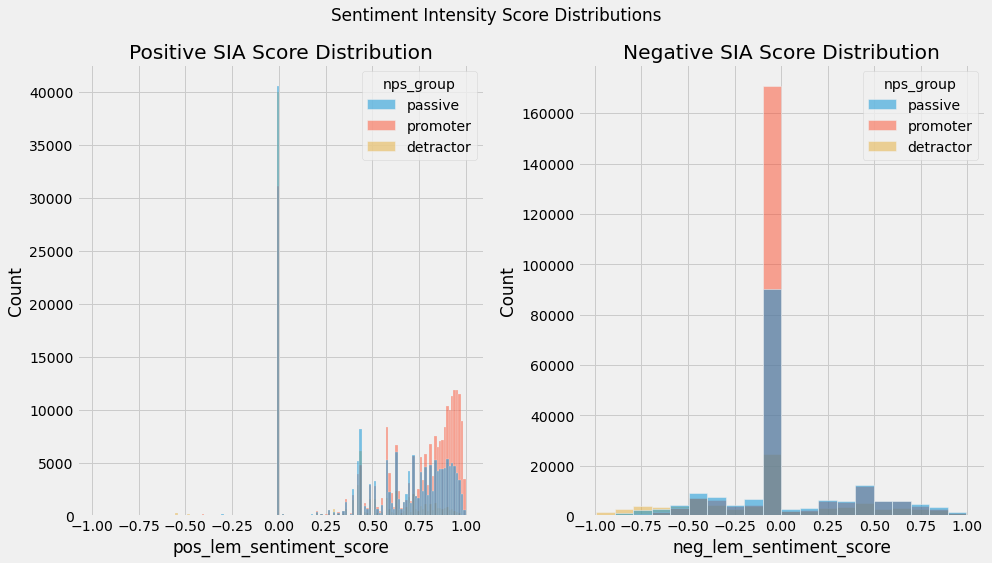

In [167]:
# Show distributions of sentiment intensity score
plt.figure(figsize=(14,8))
plt.suptitle('Sentiment Intensity Score Distributions')

# Visualize positive review sentiment intensity distribution
plt.subplot(121)
sns.histplot(data=df, x='pos_lem_sentiment_score', hue='nps_group')
plt.title('Positive SIA Score Distribution')

# Visualize negative review sentiment intensity distribution
plt.subplot(122)
sns.histplot(data=df, x='neg_lem_sentiment_score', hue= 'nps_group')
plt.title('Negative SIA Score Distribution')

plt.tight_layout()

### $H_0$: There is no relationship between nights stayed and reviewer score.

### $H_a$: There is a relationship between nights stayed and reviewer score.

The null hypothesis can be rejected. The r coefficient was -0.017314452073055965 and the p-value was 1.6819570748144253e-35.


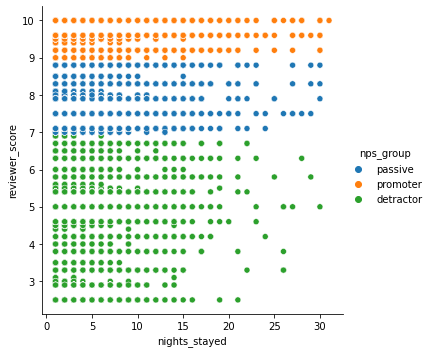

In [6]:
sns.relplot(data=df, x='nights_stayed', y='reviewer_score', hue='nps_group')

r_coeff, pval = stats.spearmanr(df.nights_stayed, df.reviewer_score)

if pval < .05:
    print(f'The null hypothesis can be rejected. The r coefficient was {r_coeff} and the p-value was {pval}.')
else:
    print(f'We fail to reject the null hypothesis. The r coefficient was {r_coeff} and the p-value was {pval}, which is greater than our established alpha of 0.05.')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 515738 non-null  object 
 1   month_name                                  515738 non-null  object 
 2   month                                       515738 non-null  int64  
 3   year                                        515738 non-null  int64  
 4   day_name                                    515738 non-null  object 
 5   day                                         515738 non-null  int64  
 6   quarter                                     515738 non-null  int64  
 7   hotel_name                                  515738 non-null  object 
 8   street                                      515738 non-null  object 
 9   city                                        515738 non-null  object 
 

In [9]:
len(df[df.trip_type == 'leisure']) / len(df) * 100

81.00585956435245

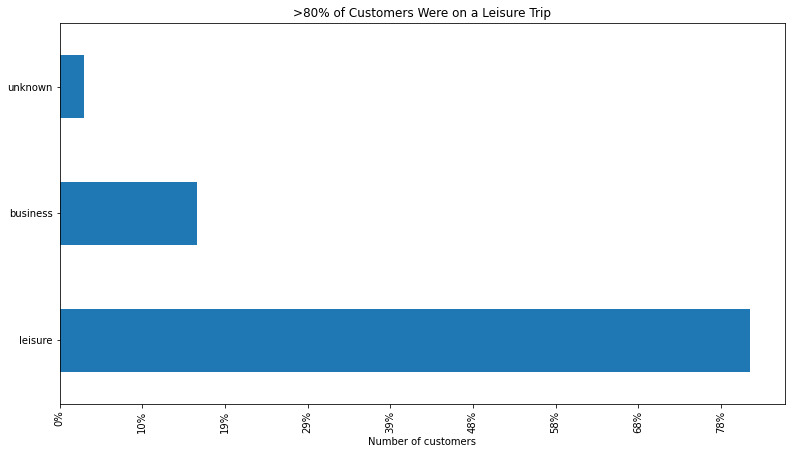

In [33]:
import matplotlib.ticker as mtick
plt.figure(figsize=(13,7))
ax = df.trip_type.value_counts().plot.barh()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(df), decimals=None))
#plt.gca().xaxis.set_major_formatter('{:.0%}'.format)


plt.title('>80% of Customers Were on a Leisure Trip')
# add labels
plt.xlabel('Number of customers')
plt.xticks(rotation=90)
plt.show()


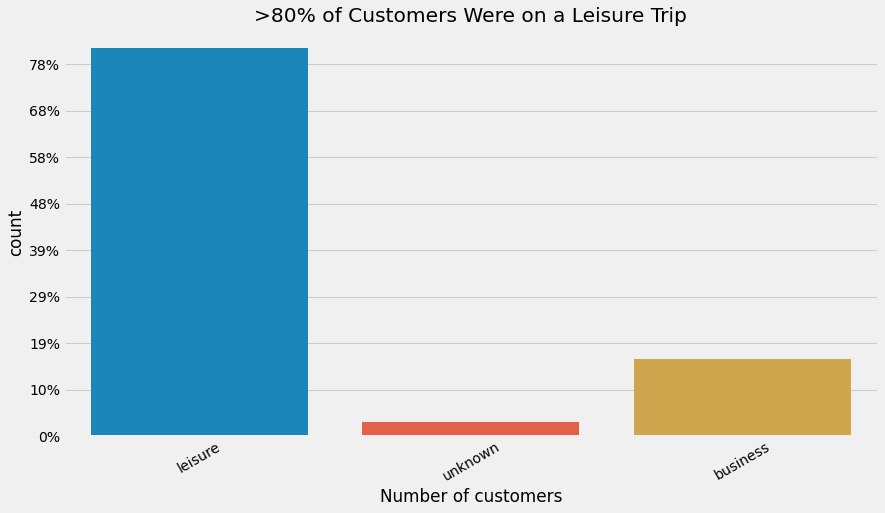

In [34]:
import matplotlib.ticker as mtick
# #visualize the count of customers by trip type
plt.figure(figsize=(13,7))
ax = sns.countplot(x='trip_type', data=df)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(df), decimals=None))
plt.title('>80% of Customers Were on a Leisure Trip')
plt.xlabel('Number of customers')
plt.xticks(rotation=30)
plt.show()

In [ ]:
plt.figure(figsize=(16,9))

#plt.subplot(121)
df.groupby('hotel_name').reviewer_score.agg(['min']).sort_values('min', ascending=False).head(15).plot.bar(width=.8)
plt.title('Min reviewer score, top 15 hotels')

plt.subplot(122)
df.groupby('hotel_name').reviewer_score.agg(['mean', 'median']).sort_values('mean', ascending=False).head(15).plot.bar()
plt.title('Mean and median reviewer score, top 15 hotels')


<Figure size 936x504 with 0 Axes>

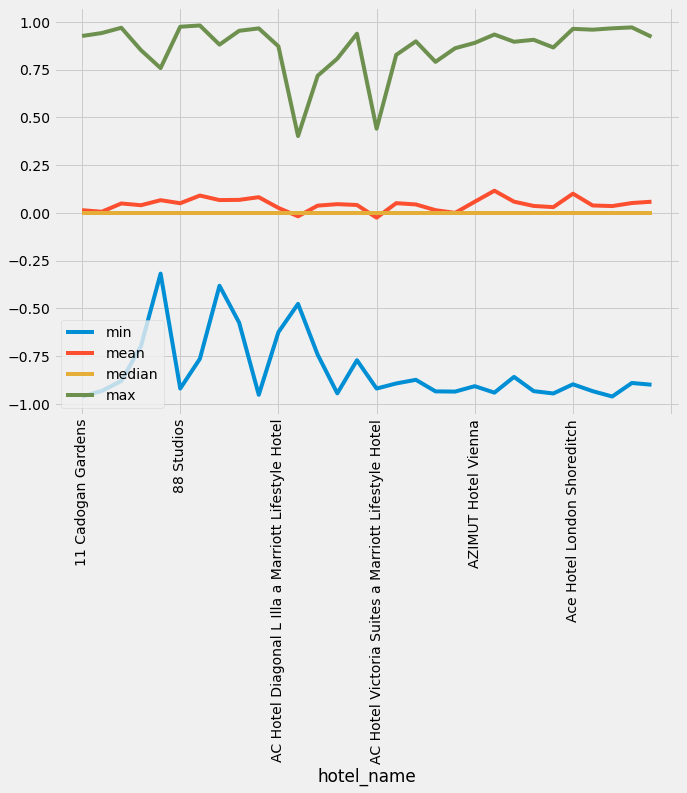

In [36]:
plt.figure(figsize=(13,7))
df.groupby('hotel_name').neg_sentiment_score.agg(['min', 'mean', 'median', 'max']).head(30).plot()
plt.xticks(rotation=90)
plt.show()


In [3]:
df.columns

Index(['month', 'year', 'day_name', 'day', 'quarter', 'hotel_name', 'street',
       'city', 'zip_code', 'country', 'lat', 'lng',
       'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'neg_sentiment_score', 'neg_lem_sentiment_score',
       'review_total_negative_word_counts', 'negative_unique_word_count',
       'pos_sentiment_score', 'review_total_positive_word_counts',
       'positive_unique_word_count', 'pos_lem_sentiment_score',
       'negative_review', 'negative_clean_review', 'negative_stem',
       'negative_lemma', 'positive_review', 'positive_clean_review',
       'positive_stem', 'positive_lemma'],
      dtype='object')

In [38]:
import shap
from wordcloud import WordCloud

In [39]:
pos_corpus = wr.basic_clean(' '.join(df[df.positive_review.notna()].positive_review.str.strip()))
pos_corpus = wr.remove_stopwords(pos_corpus)
pos_corpus = wr.lemmatize(pos_corpus)


neg_corpus = wr.basic_clean(' '.join(df[df.negative_review.notna()].negative_review.str.strip()))
neg_corpus = wr.remove_stopwords(neg_corpus)
neg_corpus = wr.lemmatize(neg_corpus)


In [67]:
type(pos_corpus)

str

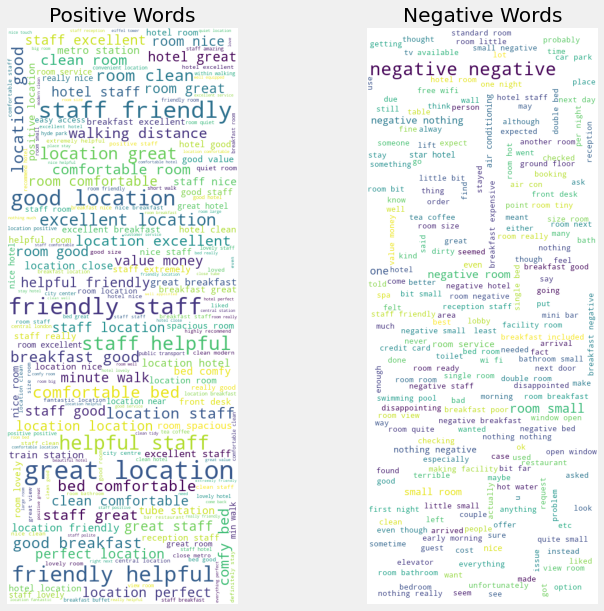

In [40]:
pos_cloud = WordCloud(background_color='white', height=1000, width=400).generate_from_text(pos_corpus)
neg_cloud = WordCloud(background_color='white', height=1000, width=400).generate_from_text(neg_corpus)

plt.figure(figsize=(10,8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, 0, .5, 1])]

axs[0].imshow(pos_cloud)
axs[1].imshow(neg_cloud)

axs[0].set_title('Positive Words')
axs[1].set_title('Negative Words')

for ax in axs: ax.axis('off')

In [41]:
pos_corpus_s = pd.Series(pos_corpus.split())
pos_wd_counts = pos_corpus_s.value_counts()
neg_corpus_s = pd.Series(neg_corpus.split())
neg_wd_counts = neg_corpus_s.value_counts()

pos_wd_counts

staff              196634
location           193607
room               181116
hotel              130109
good               112387
                    ...  
terrifically            1
playgroup               1
marchese                1
masseroni               1
confidentiality         1
Length: 47664, dtype: int64

In [43]:
neg_wd_counts

room            210828
negative        129780
hotel            80413
breakfast        59224
small            49885
                 ...  
veza                 1
slaba                1
surplus              1
diappointing         1
cloor                1
Length: 51345, dtype: int64

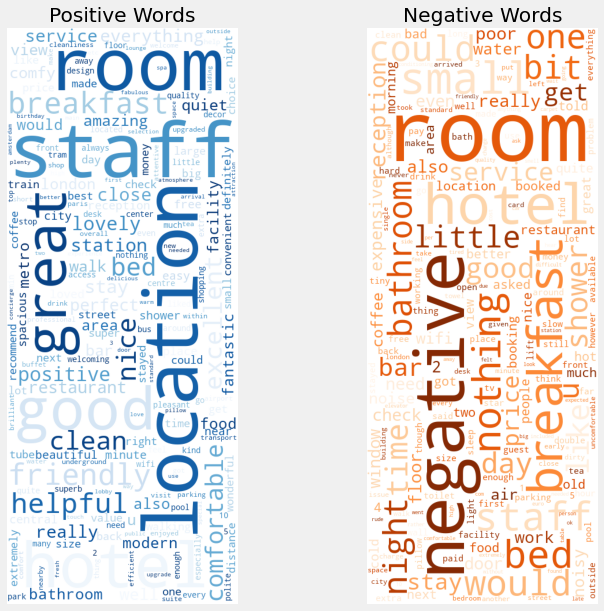

In [42]:
pos_freq_cloud = WordCloud(background_color='white', height=1000, width=400, colormap= 'Blues').generate_from_frequencies(pos_wd_counts)
neg_freq_cloud = WordCloud(background_color='white', height=1000, width=400, colormap= 'Oranges').generate_from_frequencies(neg_wd_counts)

plt.figure(figsize=(10,8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, 0, .5, 1])]

axs[0].imshow(pos_freq_cloud)
axs[1].imshow(neg_freq_cloud)

axs[0].set_title('Positive Words')
axs[1].set_title('Negative Words')

for ax in axs: ax.axis('off')

In [43]:
from PIL import Image
europe_mask = np.array(Image.open('viz_files/sloppy_euro_mask.jpg'))

#europe_mask

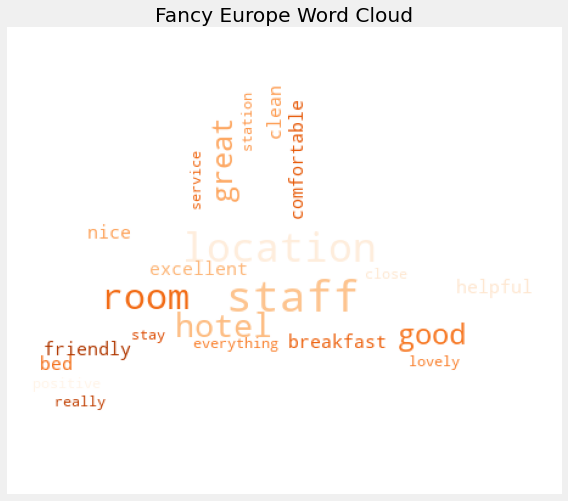

In [47]:
europa_cloud = WordCloud(
    scale=3, 
    colormap='Oranges',
    mask=europe_mask,
    background_color='white',
    collocations=True).generate_from_frequencies(pos_wd_counts)

plt.figure(figsize=(10,8))
plt.imshow(europa_cloud)
plt.axis('off')
plt.title('Fancy Europe Word Cloud')
plt.show()

<AxesSubplot:xlabel='nps_group', ylabel='pos_sentiment_score'>

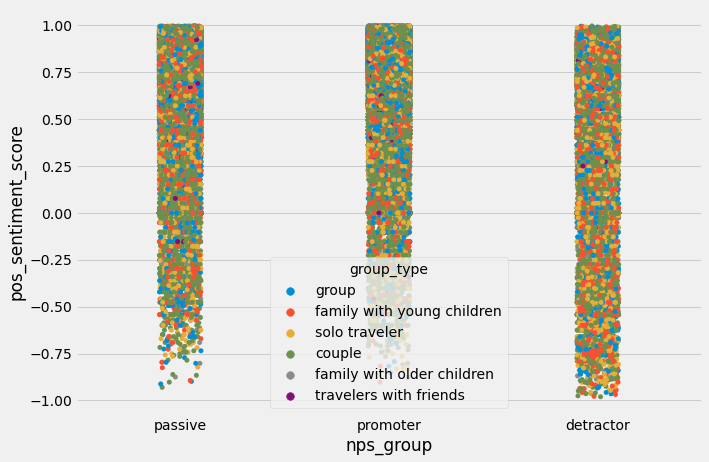

In [48]:
sns.stripplot(data=df, y='pos_sentiment_score', x='nps_group', hue='group_type')

In [5]:
df.groupby('nps_group').pos_sentiment_score.agg(['min', 'mean', 'max'])

,min,mean,max
nps_group,,,
detractor,-0.9802,0.296019,0.9971
passive,-0.9300,0.551103,0.9982
promoter,-0.9022,0.681291,0.9987


In [49]:
df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,negative_topic,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,positive_topic,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,facilities,0.4019,8,6,0.4019,location,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2,group,10,8.3,passive,730,0.0000,0.0000,0,2,blank,0.7906,7,6,0.7906,location,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,blank,0.7579,7,6,0.7579,hotel,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2,group,34,9.6,promoter,730,0.0000,0.0000,0,2,blank,0.9414,27,23,0.9414,location,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,blank,0.7964,6,5,0.7964,location,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   month_name                                  515738 non-null  object 
 1   month                                       515738 non-null  int64  
 2   year                                        515738 non-null  int64  
 3   day_name                                    515738 non-null  object 
 4   day                                         515738 non-null  int64  
 5   quarter                                     515738 non-null  int64  
 6   hotel_name                                  515738 non-null  object 
 7   street                                      515738 non-null  object 
 8   city                                        515738 non-null  object 
 9   zip_code                                    515738 non-null  object 
 

In [6]:
med_lats = df.groupby('city').lat.agg(['median'])
med_longs = df.groupby('city').lng.agg(['median'])
#median_coords = pd.concat([med_lats, med_longs], axis=1)
#median_coords.columns = ['median_lat', 'median_lng']
#median_coords

amster_lats = df[(df.city == 'Amsterdam')].lat.fillna(med_lats.iloc[0][0])
barza_lats = df[(df.city == 'Barcelona')].lat.fillna(med_lats.iloc[1][0])
london_lats = df[(df.city == 'London')].lat.fillna(med_lats.iloc[2][0])
milan_lats = df[(df.city == 'Milan')].lat.fillna(med_lats.iloc[3][0])
paris_lats = df[(df.city == 'Paris')].lat.fillna(med_lats.iloc[4][0])
vienna_lats = df[(df.city == 'Vienna')].lat.fillna(med_lats.iloc[5][0])

df.lat = pd.concat([amster_lats, barza_lats, london_lats, milan_lats, paris_lats, vienna_lats], axis=0, ignore_index=False)


amster_longs = df[(df.city == 'Amsterdam')].lng.fillna(med_longs.iloc[0][0])
barza_longs = df[(df.city == 'Barcelona')].lng.fillna(med_longs.iloc[1][0])
london_longs = df[(df.city == 'London')].lng.fillna(med_longs.iloc[2][0])
milan_longs = df[(df.city == 'Milan')].lng.fillna(med_longs.iloc[3][0])
paris_longs = df[(df.city == 'Paris')].lng.fillna(med_longs.iloc[4][0])
vienna_longs = df[(df.city == 'Vienna')].lng.fillna(med_longs.iloc[5][0])


df.lng = pd.concat([amster_longs, barza_longs, london_longs, milan_longs, paris_longs, vienna_longs], axis=0, ignore_index=False)



,median_lat,median_lng
city,,
Amsterdam,52.366373,4.888644
Barcelona,41.388024,2.169670
London,51.510844,-0.142448
Milan,45.478736,9.196131
Paris,48.867139,2.328075
Vienna,48.204465,16.368640


In [26]:
pos_dom_topics = pd.read_csv('dominant_topic.csv', index_col=False)

pos_dom_topics = pos_dom_topics.drop(columns=['Unnamed: 0'])

pos_dom_topics

,0
0,8
1,9
2,9
3,6
4,4
...,...
515733,7
515734,4
515735,4
515736,4


In [27]:
pos_dom_topics.rename(columns= {0: 'Topic'}, inplace=True)

In [50]:
pos_keywords = pd.read_csv('positive_topic_keywords.csv')
pos_keywords.columns

Index(['Unnamed: 0', 'Word 0', 'Word 1', 'Word 2', 'Word 3', 'Word 4',
       'Word 5', 'Word 6', 'Word 7', 'Word 8', 'Word 9', 'Word 10', 'Word 11',
       'Word 12', 'Word 13', 'Word 14'],
      dtype='object')

In [51]:
pos_keywords.rename(columns= {'Unnamed: 0': 'Topic'}, inplace= True)
pos_keywords

,Topic,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
0,Topic 0,hotel great location,staff great location,room clean comfortable,hotel good location,room spacious clean,good location close,room comfy bed,helpful staff great,great location staff,good location friendly,staff excellent location,breakfast friendly staff,comfortable staff friendly,great location clean,good staff friendly
1,Topic 1,staff helpful friendly,staff good location,staff really helpful,staff extremely friendly,clean comfortable room,great location close,staff friendly room,location helpful staff,helpful staff good,staff super friendly,comfortable bed good,bed extremely comfortable,great location good,good size room,staff nice helpful
2,Topic 2,staff friendly helpful,staff extremely helpful,room comfortable bed,room good size,friendly helpful room,location great staff,hotel staff friendly,friendly staff clean,close metro station,staff good breakfast,bed really comfortable,location staff friendly,close tube station,easy walking distance,bed comfortable staff
3,Topic 3,friendly helpful staff,good value money,friendly staff good,room friendly staff,location walking distance,clean staff friendly,location friendly helpful,bed super comfy,room good breakfast,great location nice,bed comfy room,breakfast good location,location good breakfast,comfy bed great,excellent value money
4,Topic 4,location friendly staff,helpful friendly staff,great location friendly,friendly staff great,staff really friendly,bed comfortable room,great value money,great location great,hotel friendly staff,location minute walk,room great location,location excellent staff,bed really comfy,staff polite helpful,really friendly helpful


In [52]:
pos_keywords.columns = [col.lower() for col in pos_keywords.columns]
pos_keywords.columns = [col.replace(' ', '_') for col in pos_keywords.columns]

In [53]:
pos_keywords

,topic,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,word_11,word_12,word_13,word_14
0,Topic 0,hotel great location,staff great location,room clean comfortable,hotel good location,room spacious clean,good location close,room comfy bed,helpful staff great,great location staff,good location friendly,staff excellent location,breakfast friendly staff,comfortable staff friendly,great location clean,good staff friendly
1,Topic 1,staff helpful friendly,staff good location,staff really helpful,staff extremely friendly,clean comfortable room,great location close,staff friendly room,location helpful staff,helpful staff good,staff super friendly,comfortable bed good,bed extremely comfortable,great location good,good size room,staff nice helpful
2,Topic 2,staff friendly helpful,staff extremely helpful,room comfortable bed,room good size,friendly helpful room,location great staff,hotel staff friendly,friendly staff clean,close metro station,staff good breakfast,bed really comfortable,location staff friendly,close tube station,easy walking distance,bed comfortable staff
3,Topic 3,friendly helpful staff,good value money,friendly staff good,room friendly staff,location walking distance,clean staff friendly,location friendly helpful,bed super comfy,room good breakfast,great location nice,bed comfy room,breakfast good location,location good breakfast,comfy bed great,excellent value money
4,Topic 4,location friendly staff,helpful friendly staff,great location friendly,friendly staff great,staff really friendly,bed comfortable room,great value money,great location great,hotel friendly staff,location minute walk,room great location,location excellent staff,bed really comfy,staff polite helpful,really friendly helpful


In [55]:
import topic_modeling
positive_dominant_topics, positive_keywords, negative_dominant_topics, negative_keywords = topic_modeling.acquire_topics(df.positive_lemma, df.negative_lemma)

#rename the columns for further analysis with pandas
positive_dominant_topics.rename(columns={'0':'positive_dominant_topic'}, inplace=True)
negative_dominant_topics.rename(columns={'0':'negative_dominant_topic'}, inplace=True)
#reset the index of the original dataframe
df = df.reset_index()
#concatenate the positive and negative dominant topics onto the original dataframe as new categorical columns
df = pd.concat([df, positive_dominant_topics.positive_dominant_topic, negative_dominant_topics.negative_dominant_topic], axis=1)
df.head(3)

Using cached csv file...


,index,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,negative_topic,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,positive_topic,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma,positive_dominant_topic,negative_dominant_topic
0,0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,facilities,0.4019,8,6,0.4019,location,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible,0,2
1,1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2,group,10,8.3,passive,730,0.0000,0.0000,0,2,blank,0.7906,7,6,0.7906,location,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great,2,0
2,2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,blank,0.7579,7,6,0.7579,hotel,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel,0,0


<Figure size 936x504 with 0 Axes>

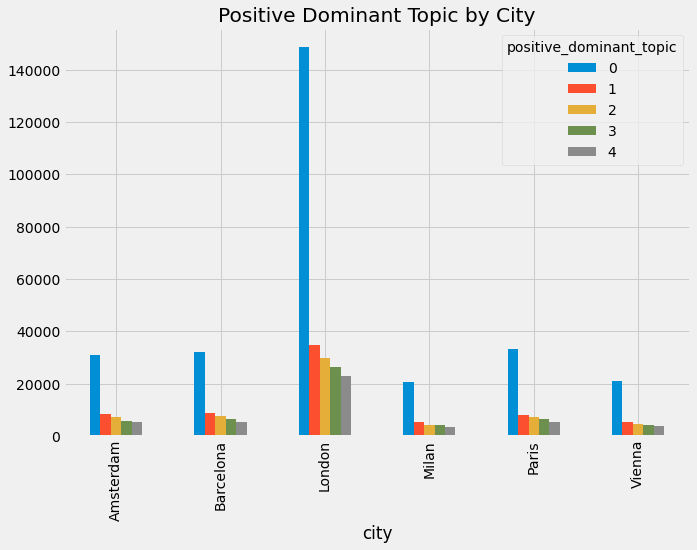

In [56]:
plt.figure(figsize=(13,7))
ax = pd.crosstab(df.city, df.positive_dominant_topic).plot.bar()

plt.title('Positive Dominant Topic by City')
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   index                                       515738 non-null  int64  
 1   review_date                                 515738 non-null  object 
 2   month_name                                  515738 non-null  object 
 3   month                                       515738 non-null  int64  
 4   year                                        515738 non-null  int64  
 5   day_name                                    515738 non-null  object 
 6   day                                         515738 non-null  int64  
 7   quarter                                     515738 non-null  int64  
 8   hotel_name                                  515738 non-null  object 
 9   street                                      515738 non-null  object 
 

In [5]:
df.topic_type.value_counts()

couple                        252294
solo traveler                 108545
group                          65392
family with young children     61015
family with older children     26349
travelers with friends          2143
Name: group_type, dtype: int64

In [7]:
interest_groups = df[(df.group_type == 'couple') & (df.trip_type == 'leisure') & (df.nights_stayed <= 3)]
interest_groups.columns

Index(['review_date', 'month_name', 'month', 'year', 'day_name', 'day',
       'quarter', 'hotel_name', 'street', 'city', 'zip_code', 'country', 'lat',
       'lng', 'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'nps_group', 'days_since_review', 'neg_sentiment_score',
       'neg_lem_sentiment_score', 'review_total_negative_word_counts',
       'negative_unique_word_count', 'negative_topic', 'pos_sentiment_score',
       'review_total_positive_word_counts', 'positive_unique_word_count',
       'pos_lem_sentiment_score', 'positive_topic', 'negative_review',
       'negative_clean_review', 'negative_lemma', 'positive_review',
       'positive_clean_review', 'positive_lemma'],
      dtype='object')

In [83]:
pos_topic_couples = pd.crosstab(interest_groups.group_type, interest_groups.positive_topic).T
neg_topic_couples = pd.crosstab(interest_groups.group_type, interest_groups.negative_topic).T

pos_topic_leisure = pd.crosstab(interest_groups.trip_type, interest_groups.positive_topic).T
neg_topic_leisure = pd.crosstab(interest_groups.trip_type, interest_groups.negative_topic).T



pos_topic_nights = pd.crosstab(interest_groups.nights_stayed, interest_groups.positive_topic).T
neg_topic_nights = pd.crosstab(interest_groups.nights_stayed, interest_groups.negative_topic).T



In [84]:
pos_topic_nights

nights_stayed,1,2,3
positive_topic,,,
blank,5721,3661,2540
comfort,5710,3878,2705
facilities,5203,3877,2753
hotel,2103,1480,1004
location,18219,15955,12610
no_topic,3779,2169,1367
number,3,3,0
room,17477,10525,7307
staff,26913,20326,15151


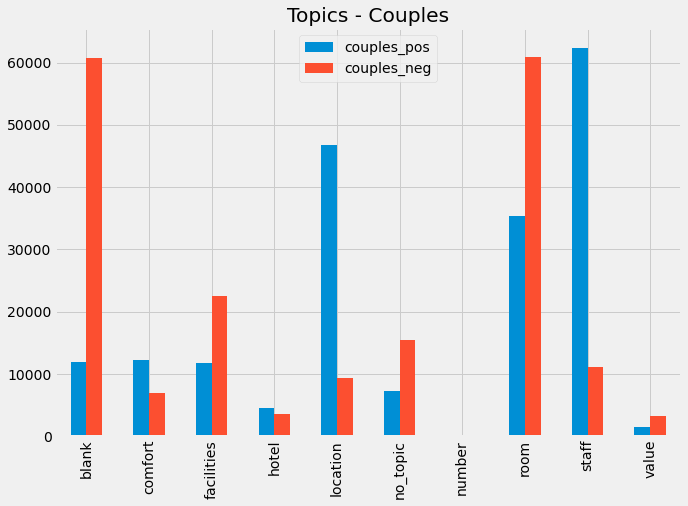

Text(0.5, 1.0, 'Topics - Leisure Travelers')

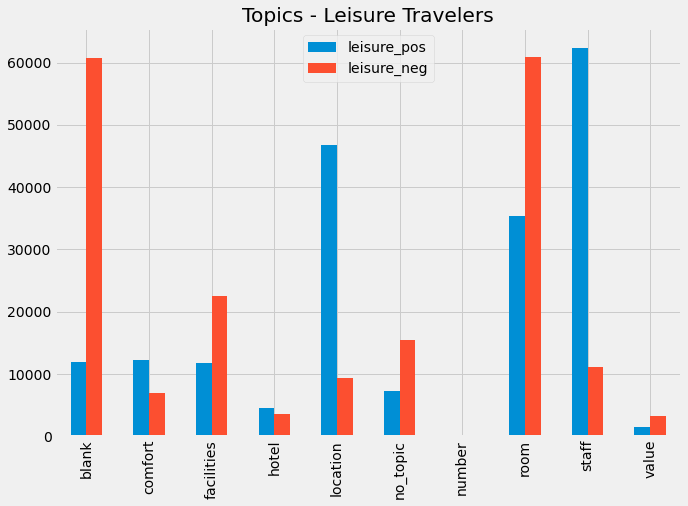

In [117]:
couples_and_leisure = pd.concat([pos_topic_couples, neg_topic_couples, pos_topic_leisure, neg_topic_leisure], axis=1)
couples_and_leisure.columns = ['couples_pos', 'couples_neg', 'leisure_pos', 'leisure_neg']


couples_and_leisure[['couples_pos', 'couples_neg']].plot.bar()
plt.title('Topics - Couples')
plt.show()

couples_and_leisure[['leisure_pos', 'leisure_neg']].plot.bar()
plt.title('Topics - Leisure Travelers')


Text(0.5, 1.0, 'Topics - Three Nights or Less Stayed')

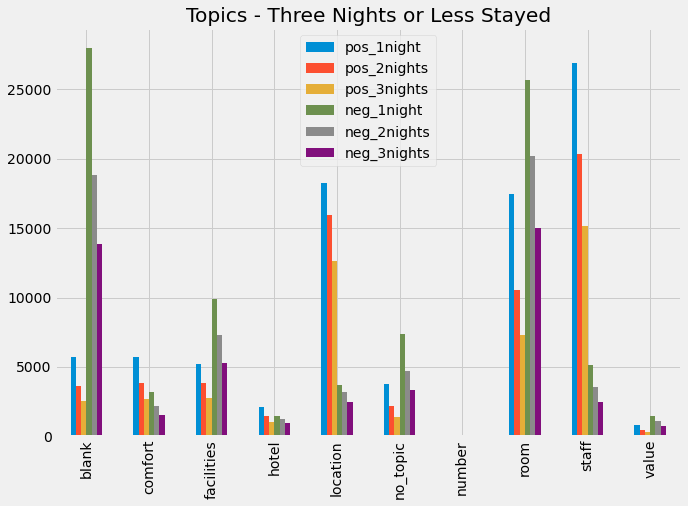

In [116]:
three_nights = pd.concat([pos_topic_nights, neg_topic_nights], axis=1)
three_nights.columns = ['pos_1night', 'pos_2nights', 'pos_3nights', 'neg_1night', 'neg_2nights', 'neg_3nights']

three_nights.plot.bar()
plt.title('Topics - Three Nights or Less Stayed')

<AxesSubplot:xlabel='nights_stayed'>

<Figure size 936x504 with 0 Axes>

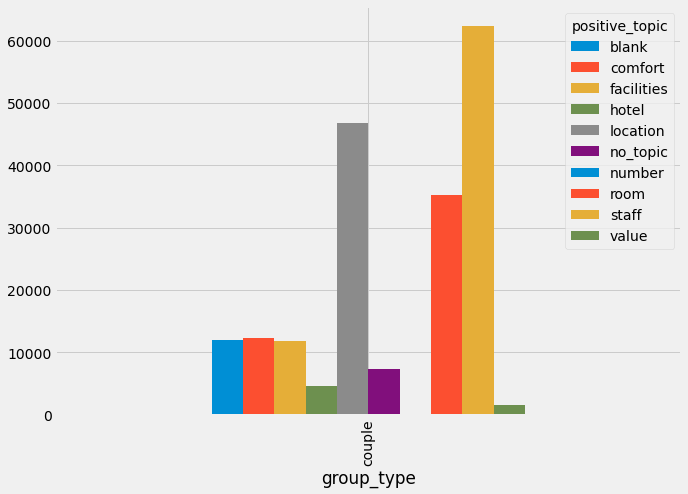

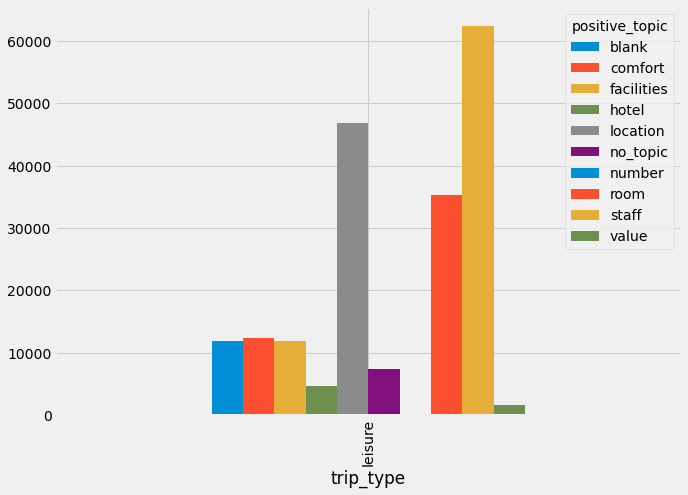

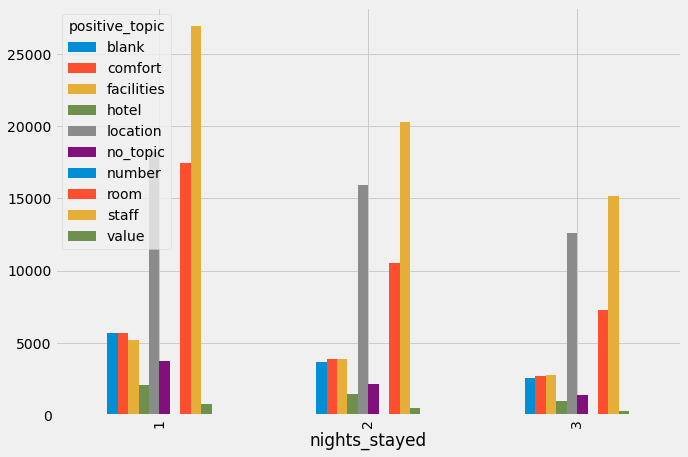

In [61]:
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

plt.figure(figsize=(13,7))
pd.crosstab(interest_groups.group_type, interest_groups.positive_topic).plot.bar()
pd.crosstab(interest_groups.trip_type, interest_groups.positive_topic).plot.bar()
pd.crosstab(interest_groups.nights_stayed, interest_groups.positive_topic).plot.bar()



<AxesSubplot:xlabel='Count', ylabel='pos_lem_sentiment_score'>

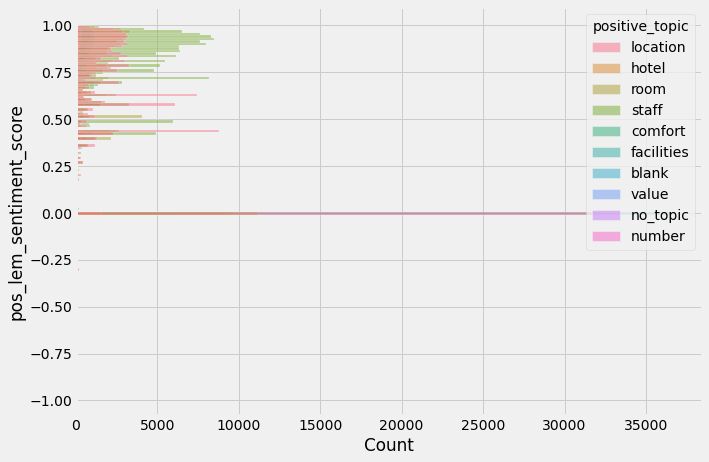

In [115]:
sns.histplot(data=df, y='pos_lem_sentiment_score', hue='positive_topic')



In [22]:
df.positive_topic.value_counts()

staff         162166
location      128145
room           86280
blank          36624
comfort        34567
facilities     30825
no_topic       20761
hotel          11880
value           4475
number            15
Name: positive_topic, dtype: int64

In [23]:
df.negative_topic.value_counts()

room          167663
blank         153094
facilities     58604
no_topic       41819
staff          33016
location       24982
comfort        17177
hotel          10533
value           8842
number             8
Name: negative_topic, dtype: int64

<Figure size 936x504 with 0 Axes>

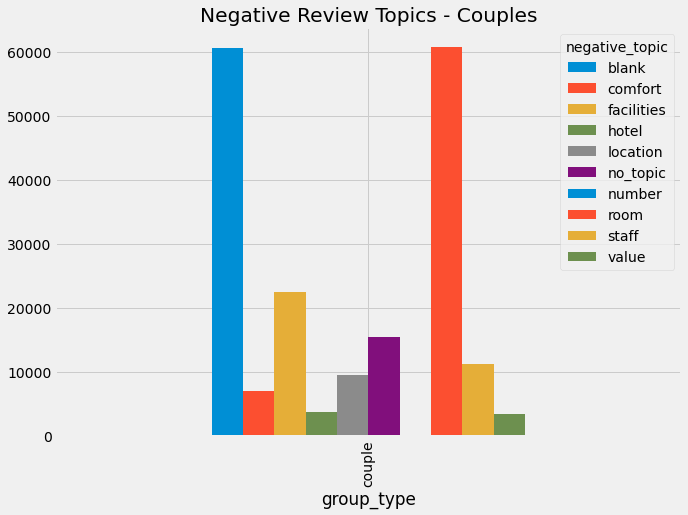

<Figure size 936x504 with 0 Axes>

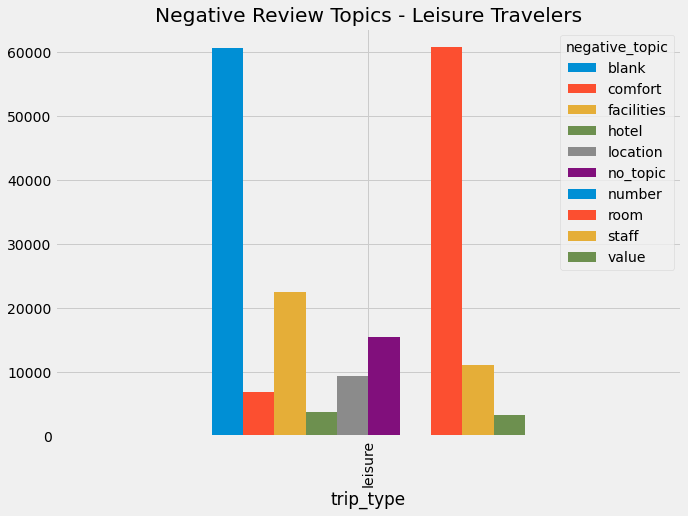

<Figure size 936x504 with 0 Axes>

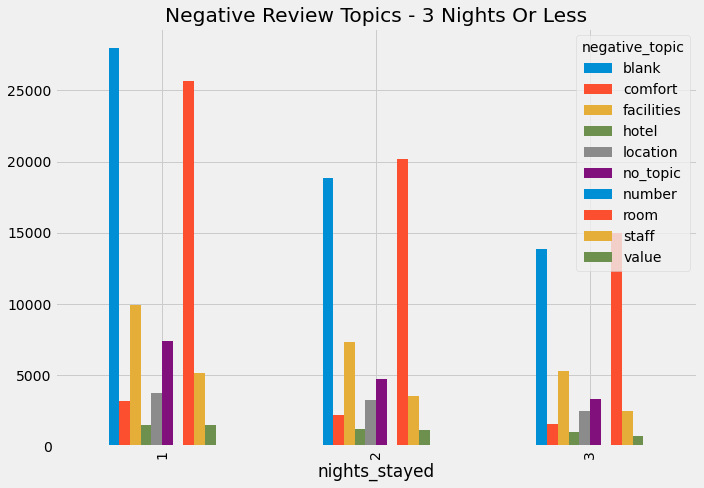

In [25]:
plt.figure(figsize=(13,7))
pd.crosstab(interest_groups.group_type, interest_groups.negative_topic).plot.bar()
plt.title('Negative Review Topics - Couples')
plt.figure(figsize=(13,7))
pd.crosstab(interest_groups.trip_type, interest_groups.negative_topic).plot.bar()
plt.title('Negative Review Topics - Leisure Travelers')
plt.figure(figsize=(13,7))
pd.crosstab(interest_groups.nights_stayed, interest_groups.negative_topic).plot.bar()
plt.title('Negative Review Topics - 3 Nights Or Less')
plt.tight_layout()

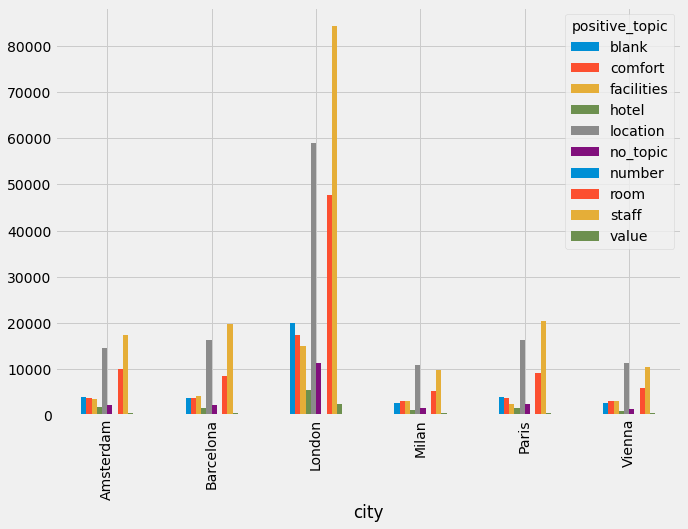

<AxesSubplot:xlabel='city'>

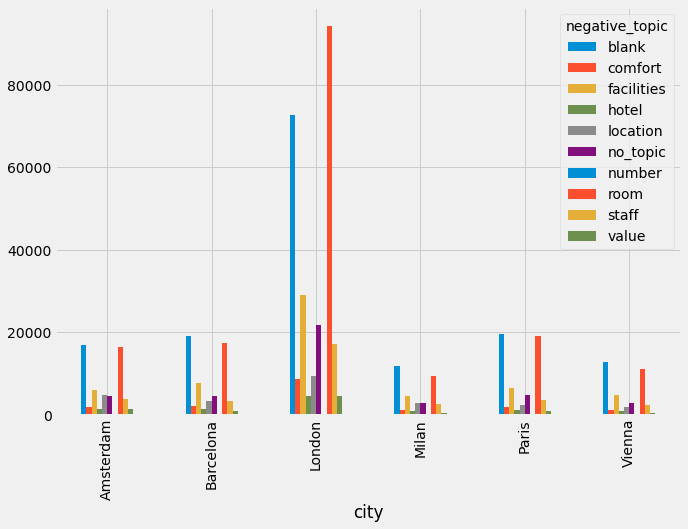

In [28]:
pd.crosstab(df.city, df.positive_topic).plot.bar()
plt.show()
pd.crosstab(df.city, df.negative_topic).plot.bar()

In [29]:
df.positive_topic.value_counts().sort_values(ascending=False).index

Index(['staff', 'location', 'room', 'blank', 'comfort', 'facilities',
       'no_topic', 'hotel', 'value', 'number'],
      dtype='object')

In [30]:
df.negative_topic.value_counts().sort_values(ascending=False).index

Index(['room', 'blank', 'facilities', 'no_topic', 'staff', 'location',
       'comfort', 'hotel', 'value', 'number'],
      dtype='object')

<Figure size 1440x864 with 0 Axes>

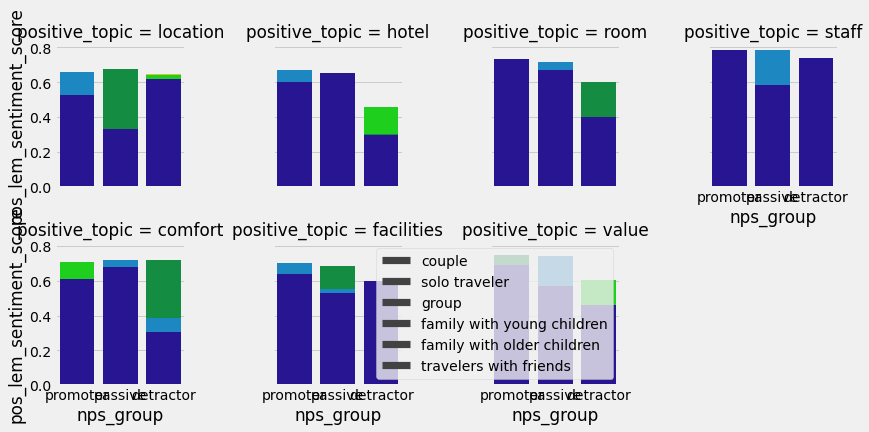

In [160]:
full_topics = df[(df.positive_topic != 'no_topic') & (df.positive_topic != 'blank') & (df.positive_topic != 'number')]

plt.figure(figsize=(20,12))
plt.suptitle('Positive Sentiment Score by Promoter Group and Group Type')
g = sns.FacetGrid(
    full_topics, 
    col='positive_topic', 
    hue='group_type',
    col_wrap=4,
    palette= 'nipy_spectral_r',
    legend_out=True,
    despine=True
    )
g.map_dataframe(sns.barplot, x='nps_group', y='pos_lem_sentiment_score', ci=False)
plt.legend(list(full_topics.group_type.value_counts().index))
plt.tight_layout()


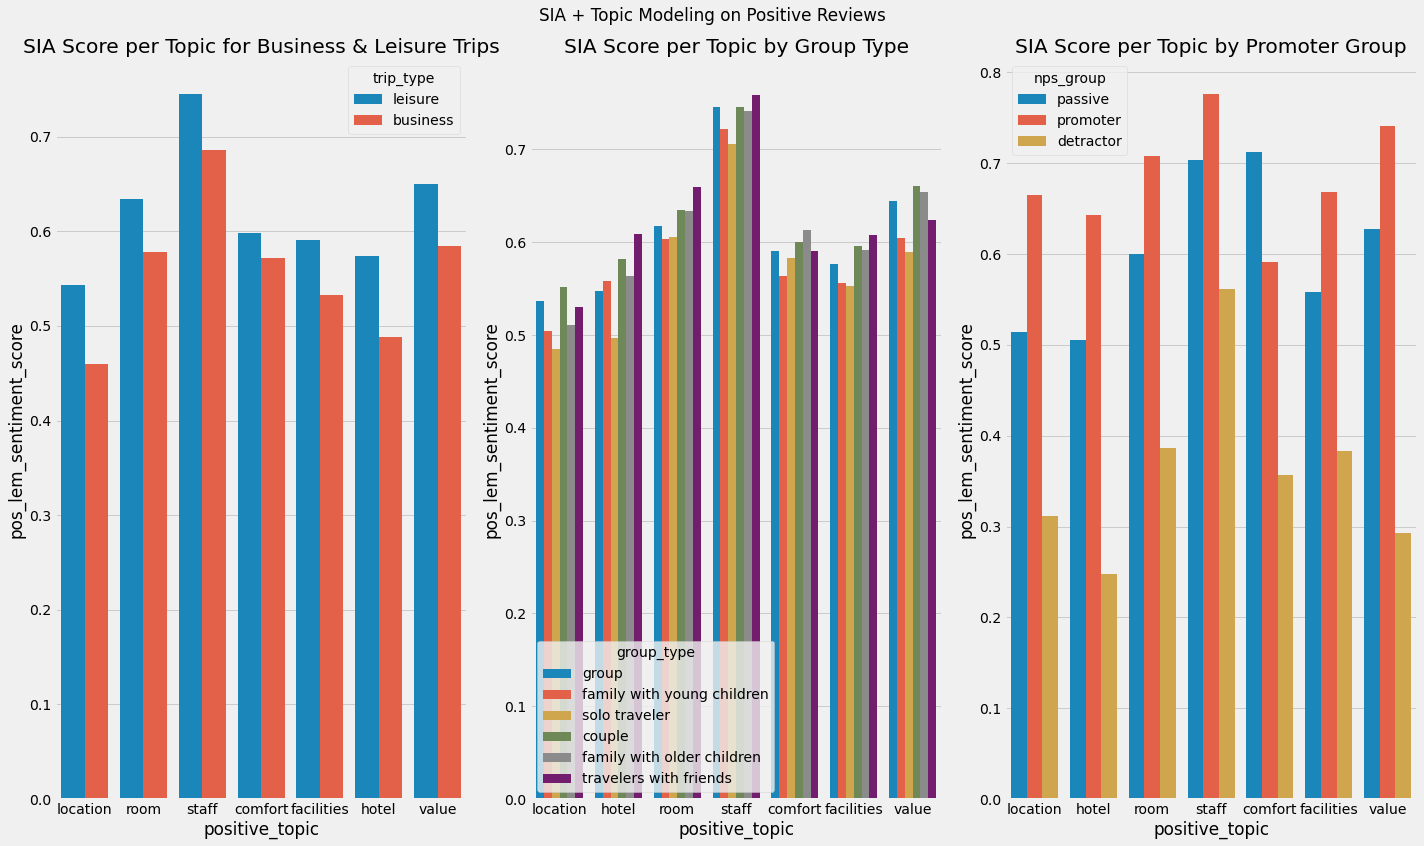

In [183]:
plt.figure(figsize=(20,12))
plt.suptitle('SIA + Topic Modeling on Positive Reviews')

plt.subplot(131)
sns.barplot(
    data=full_topics[(full_topics.trip_type == 'leisure') | (full_topics.trip_type == 'business')], 
    x='positive_topic', 
    y='pos_lem_sentiment_score', 
    hue='trip_type',
    ci=False)
plt.title('SIA Score per Topic for Business & Leisure Trips')

plt.subplot(132)
sns.barplot(data=full_topics, x='positive_topic', y='pos_lem_sentiment_score', hue='group_type', ci=False)
plt.title('SIA Score per Topic by Group Type')

plt.subplot(133)
sns.barplot(data=full_topics, x='positive_topic', y='pos_lem_sentiment_score', hue='nps_group', ci=False)
plt.title('SIA Score per Topic by Promoter Group')

plt.tight_layout()



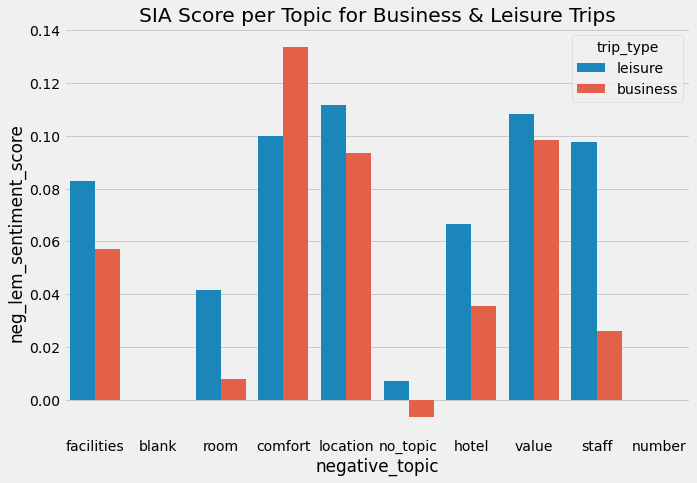

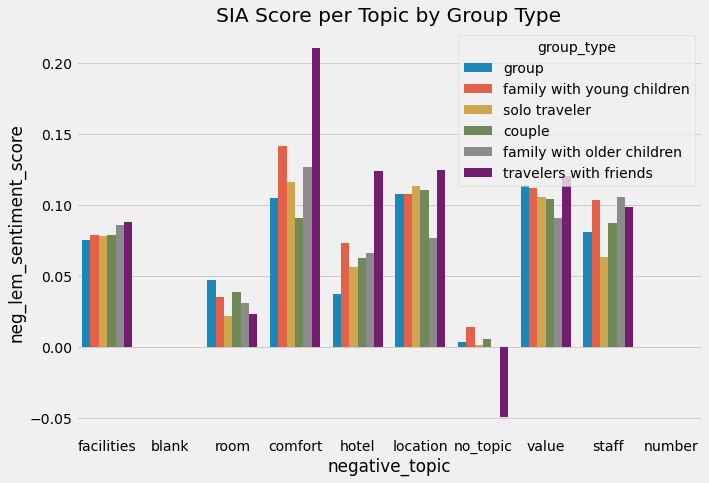

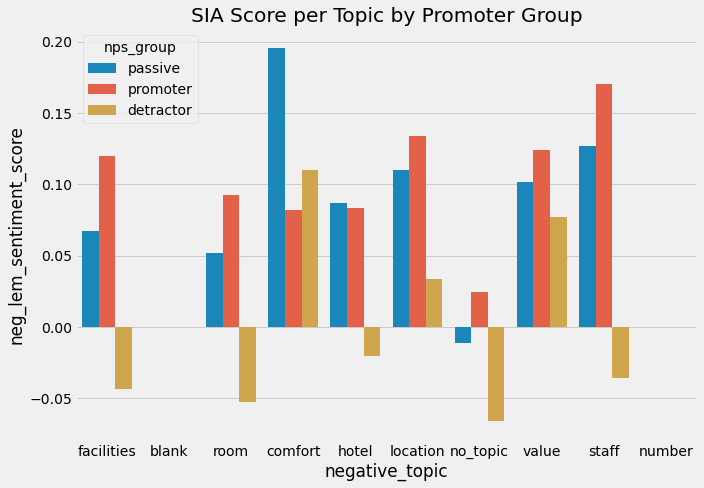

In [185]:
#plt.figure(figsize=(,12))
#plt.suptitle('SIA + Topic Modeling on Negative Reviews')

#plt.subplot(131)
sns.barplot(
    data=full_topics[(full_topics.trip_type == 'leisure') | (full_topics.trip_type == 'business')], 
    x='negative_topic', 
    y='neg_lem_sentiment_score', 
    hue='trip_type',
    ci=False)
plt.title('SIA Score per Topic for Business & Leisure Trips')
plt.show()
#plt.subplot(132)
sns.barplot(data=full_topics, x='negative_topic', y='neg_lem_sentiment_score', hue='group_type', ci=False)
plt.title('SIA Score per Topic by Group Type')
plt.show()

#plt.subplot(133)
sns.barplot(data=full_topics, x='negative_topic', y='neg_lem_sentiment_score', hue='nps_group', ci=False)
plt.title('SIA Score per Topic by Promoter Group')

plt.tight_layout()